# Analysis: Simulation of noisy target using Wednesday framework

Case: n=1,000 run to assess relationships of noisy signal and model performance 

Part of a paper submission: *The Invisible Performance of Regression Models on Noisy Measurements*

Author: Fatma-Elzahraa Eid, Broad Institute of MIT and Harvard 

In [1]:
# Imports
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Data

# Define the folder path
folder_path = 'example results'

# Simulation results 
T = pd.read_csv(os.path.join(folder_path, 'Wednesday_Framework_Training_n1000.csv'))

# Wednesday target smoothing results 
W = pd.read_csv(os.path.join(folder_path, 'Wednesday_TargetSmoothing_n250.csv'))


In [3]:
# Function: Black&White scatter plot 

fontsize = 14
markerSize = 40
corrOn = 0

def fun_scatter_patent(X, Y, Title, XLABEL, YLABEL, corrOn, markerSize, fontsize):
    plt.scatter(X, Y, s=markerSize, c='k', label='Data')
    plt.plot([min(min(X), min(Y)), max(max(X), max(Y))], [min(min(X), min(Y)), max(max(X), max(Y))], '--k', label='45-degree line')
    
    if corrOn == 1:
        r, p = pearsonr(X, Y)
        str_text = f'r = {r:.2f}\np = {p:.1e}'
        plt.gca().annotate(str_text, xy=(0.7, 0.1), xycoords='axes fraction', fontsize=fontsize, 
                           bbox=dict(facecolor='white', edgecolor='none'))

    plt.xlabel(XLABEL, fontsize=fontsize)
    plt.ylabel(YLABEL, fontsize=fontsize)
    plt.title(Title, fontsize=fontsize)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().tick_params(width=1.5, labelsize=fontsize)
    plt.gca().spines['top'].set_linewidth(1.5)
    plt.gca().spines['right'].set_linewidth(1.5)
    plt.gca().spines['bottom'].set_linewidth(1.5)
    plt.gca().spines['left'].set_linewidth(1.5)
    plt.gca().set_facecolor('white')
    plt.gcf().set_facecolor('white')
    plt.savefig('scatter_plot.tiff', dpi=300, bbox_inches='tight')
    plt.show()


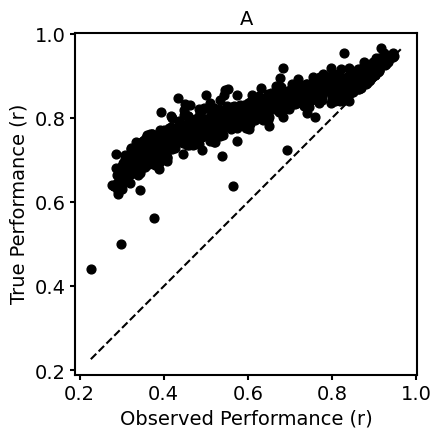

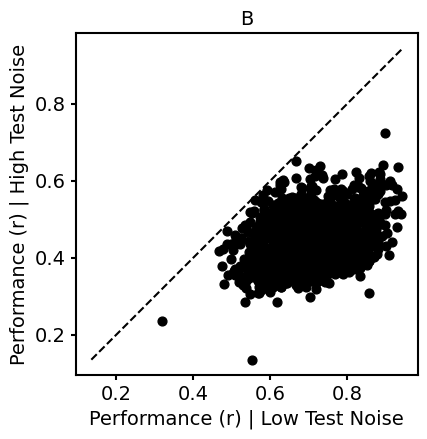

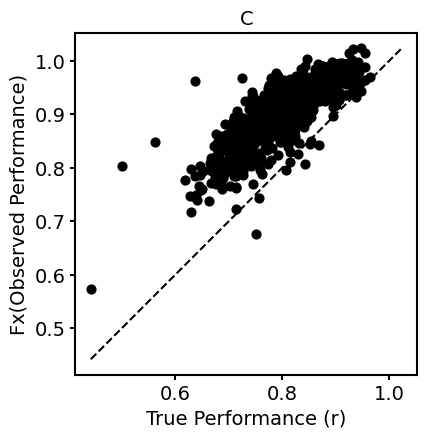

Section 3.3 correlation: r=0.8502457931198821, p=2.1586148647770474e-280


<Figure size 640x480 with 0 Axes>

In [4]:
# Section 3: Invisible Performance

# (a) Same noise in test
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
X = T['corr_pred_Ynoisy1']
Y = T['corr_pred_Ytrue']
fun_scatter_patent(X, Y, 'A', 'Observed Performance (r)', 'True Performance (r)', corrOn, markerSize, fontsize)

# (b) Different noise in test
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 2)
X = T['corr_pred_YnoisyLow']
Y = T['corr_pred_YnoisyHigh']
fun_scatter_patent(X, Y, 'B', 'Performance (r) | Low Test Noise', 'Performance (r) | High Test Noise', corrOn, markerSize, fontsize)

# (c) Application: Calculating True performance from observed performance
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 3)
X = T['corr_pred_Ytrue']
Y = (T['cov_pred_Ynoisy1'])**0.5 / (T['var_Ypred'])**0.5
fun_scatter_patent(X, Y, 'C', 'True Performance (r)', 'Fx(Observed Performance)', corrOn, markerSize, fontsize)
r, p = pearsonr(X, Y)
print(f'Section 3.3 correlation: r={r}, p={p}')

plt.suptitle('Section 3: Invisible Performance', fontsize=fontsize)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.tight_layout()
plt.show()


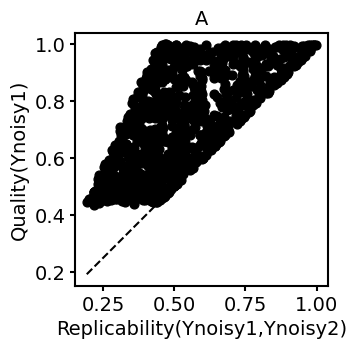

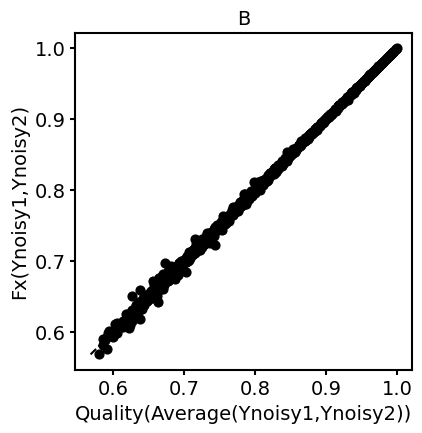

Section 4.2 Panel 1 correlation: r=0.999428810387255, p=0.0


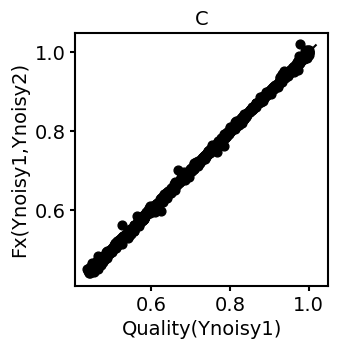

Section 4.2 Panel 2 correlation: r=0.9996442066246277, p=0.0


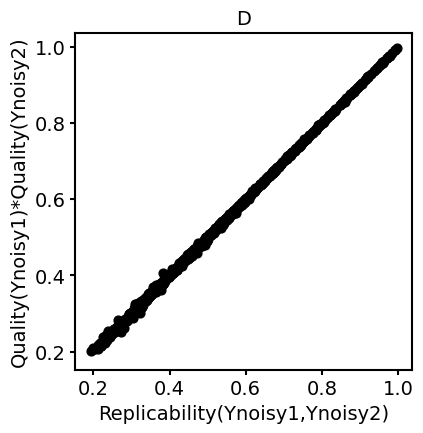

Section 4.2 Panel 3 correlation: r=0.9998384257055584, p=0.0


<Figure size 640x480 with 0 Axes>

In [5]:
# Section 4: Data Quality

# (a) Replication correlation is not an accurate measure of data quality
plt.figure(figsize=(15, 15))
plt.subplot(1, 4, 1)
X = T['corr_Ynoisy1_Ynoisy2']
Y = T['corr_Ytrue_Ynoisy1']
fun_scatter_patent(X, Y, 'A', 'Replicability(Ynoisy1,Ynoisy2)', 'Quality(Ynoisy1)', corrOn, markerSize, fontsize)

# (b) Application: Calculating True Data Quality from Observed Replication Quality
plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 2)
X = T['corr_Yavg12_Ytrue']
Y = (4*T['cov_Ynoisy1_Ynoisy2'])**0.5 / ((T['var_Ynoisy1'] + T['var_Ynoisy2'] + 2*T['cov_Ynoisy1_Ynoisy2'])**0.5)
fun_scatter_patent(X, Y, 'B', 'Quality(Average(Ynoisy1,Ynoisy2))', 'Fx(Ynoisy1,Ynoisy2)', corrOn, markerSize, fontsize)
r, p = pearsonr(X, Y)
print(f'Section 4.2 Panel 1 correlation: r={r}, p={p}')

# (c) Corr(Ynoisy1,Ytrue)
plt.figure(figsize=(15, 15))
plt.subplot(1, 4, 3)
X = T['corr_Ytrue_Ynoisy1']
Y = (T['cov_Ynoisy1_Ynoisy2'] / T['var_Ynoisy1'])**0.5
fun_scatter_patent(X, Y, 'C', 'Quality(Ynoisy1)', 'Fx(Ynoisy1,Ynoisy2)', corrOn, markerSize, fontsize)
r, p = pearsonr(X, Y)
print(f'Section 4.2 Panel 2 correlation: r={r}, p={p}')

# (d) Replicability = Quality1 * Quality2
plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 4)
X = T['corr_Ynoisy1_Ynoisy2']
Y = T['corr_Ytrue_Ynoisy1'] * T['corr_Ytrue_Ynoisy2']
fun_scatter_patent(X, Y, 'D', 'Replicability(Ynoisy1,Ynoisy2)', 'Quality(Ynoisy1)*Quality(Ynoisy2)', corrOn, markerSize, fontsize)
r, p = pearsonr(X, Y)
print(f'Section 4.2 Panel 3 correlation: r={r}, p={p}')

plt.suptitle('Section 4: Data Quality', fontsize=fontsize)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


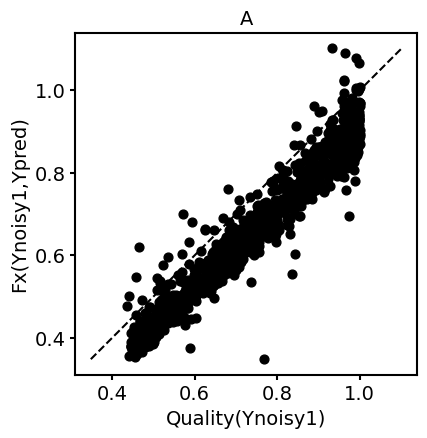

Section 5.1 correlation: r=0.9676662505588932, p=0.0


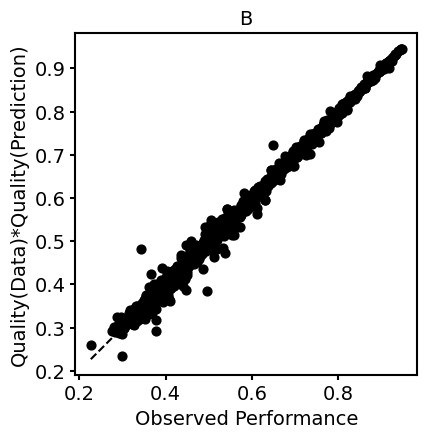

Section 5.2 correlation: r=0.9972853581863942, p=0.0


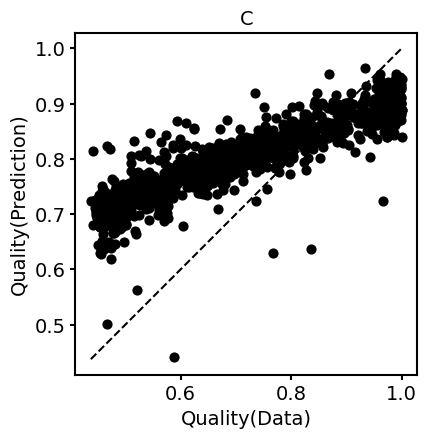

<Figure size 640x480 with 0 Axes>

In [6]:
# Section 5: ML for assessing data quality

# (a) Estimating True Data Quality for a Single Replicate
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
X = T['corr_Ytrue_Ynoisy1']
Y = (T['cov_pred_Ynoisy1'] / T['var_Ynoisy1'])**0.5
fun_scatter_patent(X, Y, 'A', 'Quality(Ynoisy1)', 'Fx(Ynoisy1,Ypred)', corrOn, markerSize, fontsize)
r, p = pearsonr(X, Y)
print(f'Section 5.1 correlation: r={r}, p={p}')

# (b) Maximum Observable Performance = Data Quality
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 2)
X = T['corr_pred_Ynoisy1']
Y = T['corr_Ytrue_Ynoisy1'] * T['corr_pred_Ytrue']
fun_scatter_patent(X, Y, 'B', 'Observed Performance', 'Quality(Data)*Quality(Prediction)', corrOn, markerSize, fontsize)
r, p = pearsonr(X, Y)
print(f'Section 5.2 correlation: r={r}, p={p}')

# (c) Predictions are more reliable than noisy measurements
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 3)
X = T['corr_Ytrue_Ynoisy1']
Y = T['corr_pred_Ytrue']
fun_scatter_patent(X, Y, 'C', 'Quality(Data)', 'Quality(Prediction)', corrOn, markerSize, fontsize)
#r, p = pearsonr(X, Y)
#print(f'Section 5.3 correlation: r={r}, p={p}')

plt.suptitle('Section 5: ML to assess data quality', fontsize=fontsize)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



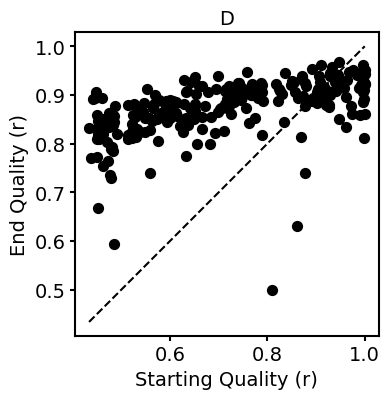

<Figure size 640x480 with 0 Axes>

In [7]:
# Wednesday Simulation
plt.figure(figsize=(18, 6))

markerSize = 50

plt.subplot(1, 4, 4)
X = W['corr_Ytrue_Ynoisy1']
Y = W['corr_pred_Ytrue']
fun_scatter_patent(X, Y, 'D', 'Starting Quality (r)', 'End Quality (r)', corrOn, markerSize, fontsize)

plt.suptitle('Wednesday Simulation', fontsize=fontsize)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
